#### [PREV](3.OOP_Polynomial_Liner_Regression.ipynb) | [HOME](../README.md) | [NEXT](5.OOP_KNN.ipynb)

---

# OOP Logistic Regression Implementation

This Jupyter Notebook provides a basic implementation of Logistic Regression for categorisation. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects continent given the other measurements we have.

#### Step 1 - Import Dependencies

In [5]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error 

#### Step 2 - Import And Visualise The Data

In [6]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

# Features variable
X_insects = insects[['wingsize', 'latitude', 'sex']]
# Target variable
y_insects = insects['continent']

insects.head()

,continent,latitude,sex,wingsize
0,1,35.5,0,901
1,1,37.0,0,896
2,1,38.6,0,906
3,1,40.7,0,907
4,1,40.9,0,898


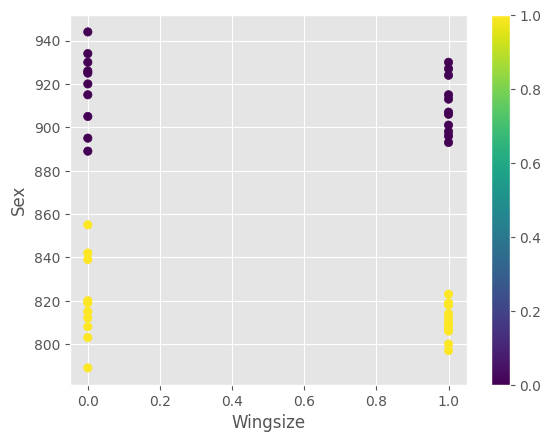

In [7]:
# Plot the data, colour coded by sex
ax = plt.scatter(insects.continent, insects.wingsize, c=insects['sex'])
plt.xlabel("Wingsize")
plt.ylabel("Sex")
plt.colorbar()
plt.show()

#### Step 3: Instantiate a LogisticRegression Object

In [8]:
insects_regression = LogisticRegression()

#### Step 4: Fit the model

In [9]:
insects_regression.fit(X_insects, y_insects)

LogisticRegression()

Now that the regression has been fit, we can use the `predict` method to forecast whether our model thinks a family will switch wells.

In [10]:
# Predict the target for the whole dataset
insects_predictions = insects_regression.predict(X_insects)

#Predict the target for a new data point
new_insect = pd.DataFrame({
    'wingsize': [1],
    'latitude': [40],
    'sex': [0]
})
new_insect['continent'] = insects_regression.predict(new_insect)
print(f"New insect is:\n{new_insect}")

New insect is:
   wingsize  latitude  sex  continent
0         1        40    0          1


Additionally (and in many cases more usefully), the `LogisticRegression` has a `predict_proba` method that produces a predicted **probability**.

In [11]:
#Predict the probabilities for the whole dataset
insects_probabilities = insects_regression.predict_proba(X_insects)

#Predict the probabilities for a new data point
new_insect = pd.DataFrame({
    'wingsize': [1],
    'latitude': [40],
    'sex': [0]
})
new_insect_probabilities = insects_regression.predict_proba(new_insect)
print(f"Probabilities for new insect are:\n{new_insect_probabilities}")

Probabilities for new insect are:
[[0.00675163 0.99324837]]


#### Step 5: Plot the Predictions

Text(0, 0.5, 'Continent Prediction')

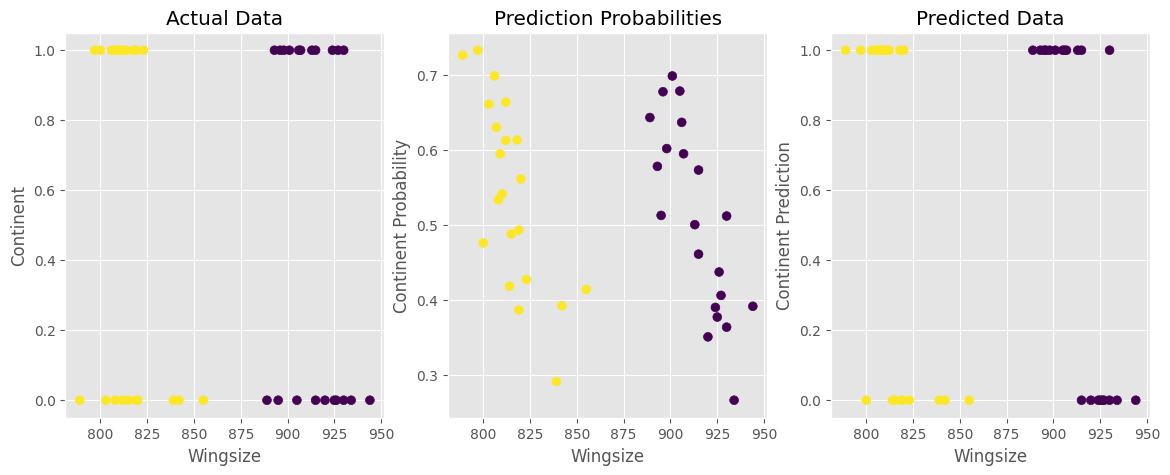

In [12]:
#Plot the predictions compared to the actual data
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

axs[0].scatter(insects.wingsize, insects.continent, s=40, c=insects['sex'])
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Wingsize")
axs[0].set_ylabel("Continent")

axs[1].scatter(insects.wingsize, insects_probabilities[:, 1], s=40, c=insects['sex'])
axs[1].set_title("Prediction Probabilities")
axs[1].set_xlabel("Wingsize")
axs[1].set_ylabel("Continent Probability")

axs[2].scatter(insects.wingsize, insects_predictions, s=40, c=insects['sex'])
axs[2].set_title("Predicted Data")
axs[2].set_xlabel("Wingsize")
axs[2].set_ylabel("Continent Prediction")

#### Step 6: Evaluate The Model

In [14]:
mae = mean_absolute_error(y_true=y_insects,y_pred=insects_probabilities[:, 1]) 
mse = mean_squared_error(y_true=y_insects,y_pred=insects_probabilities[:, 1])
print("MAE:",mae) 
print("MSE:",mse) 
print()

#Calculate the loss and cost of the model
model_loss = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': insects_probabilities[:, 1],
    'Loss': abs(y_insects - insects_regression.predict(X_insects).round(2))
})
model_loss["Predicted result"] = model_loss["Predicted result"].round(0)
model_loss["Loss"] = model_loss["Loss"].abs()
model_cost = (1/model_loss.shape[0]) * (model_loss['Loss'].sum() / model_loss.shape[0])

print(f"The cost of this model is  {model_cost:.5f}")
print(f"The model predicted incorrectly {model_loss['Loss'].sum()} times out of {model_loss.shape[0]} predictions")
print(model_loss)

MAE: 0.4668839798239841
MSE: 0.2327758162295096

The Mean Absolute Error (Cost) of this model is  0.01020
The model predicted incorrectly 18 times out of 42 predictions
    Target  Predicted result  Loss
0        1               1.0     0
1        1               1.0     0
2        1               1.0     0
3        1               1.0     0
4        1               1.0     0
5        1               1.0     0
6        1               1.0     0
7        1               0.0     1
8        1               0.0     1
9        1               0.0     1
10       1               0.0     1
11       0               1.0     1
12       0               1.0     1
13       0               1.0     1
14       0               1.0     1
15       0               1.0     1
16       0               0.0     0
17       0               0.0     0
18       0               0.0     0
19       0               0.0     0
20       0               0.0     0
21       1               1.0     0
22       1               1